1) Why DL is important?

2) Code a regression problem using Pytorch

**Why DL is important?**
+ Complex Pattern Recognition:
Deep Learning excels at learning complex patterns and representations from large amounts of data. This makes it highly effective in tasks such as image and speech recognition, natural language processing, and other applications requiring intricate pattern recognition.

+ Feature Learning:
DL algorithms can automatically learn hierarchical features and representations from raw data. This eliminates the need for manual feature engineering, making the process more efficient and allowing models to adapt to various types of data.

+ Performance Improvement:
Deep Learning has demonstrated state-of-the-art performance in various domains, outperforming traditional machine learning methods, especially when dealing with large datasets. This has led to breakthroughs in tasks such as image classification, speech recognition, and language translation.
+ Versatility:
DL models are versatile and applicable across a wide range of domains. They have been successfully employed in computer vision, natural language processing, healthcare, finance, autonomous vehicles, and many other fields, showcasing their adaptability to different applications.

+ Automation and Efficiency:
Deep Learning enables automation by automating the process of feature extraction and pattern recognition. This reduces the need for manual intervention, making the development of models more efficient and scalable.

+ Scalability:
DL models can scale with the amount of data available. As more data becomes accessible, DL models can be trained on larger datasets, potentially leading to improved performance and generalization.

+ Adaptability:
Deep Learning models can adapt well to new, unseen data. This adaptability is crucial in real-world scenarios where the input data may vary or evolve over time, allowing models to continue making accurate predictions.

+ Innovation in Research:
DL has fueled significant advancements in artificial intelligence and machine learning research. The development of new architectures, algorithms, and techniques within the DL framework has led to innovative solutions and improved the capabilities of AI systems.

+ Handling Big Data:
Deep Learning is well-suited for handling large and complex datasets, making it a valuable tool in the era of big data. DL models can efficiently process and learn from massive amounts of information, extracting meaningful insights.

In summary, Deep Learning is important due to its ability to handle complex tasks, automate feature learning, improve performance, versatility across domains, scalability, adaptability to new data, its role in research and innovation, efficient handling of big data, and its impact on enhancing user experiences in various applications.


+ We use the California housing dataset from scikit-learn.
+ The features are standardized using StandardScaler.
+ The model is a simple linear regression model implemented in PyTorch.
+ Mean squared error (MSE) is used as the loss function, and stochastic gradient descent (SGD) is used as the optimizer.
+ The model is trained on the training set, and the final performance is evaluated on the test set.
+ The results are plotted to visualize the predicted values against the true values.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read data
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.reshape(-1, 1))  # Reshape to make it a column vector

X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.reshape(-1, 1))


Epoch [100/100], Loss: 0.7447
Final Test Loss: 0.7440


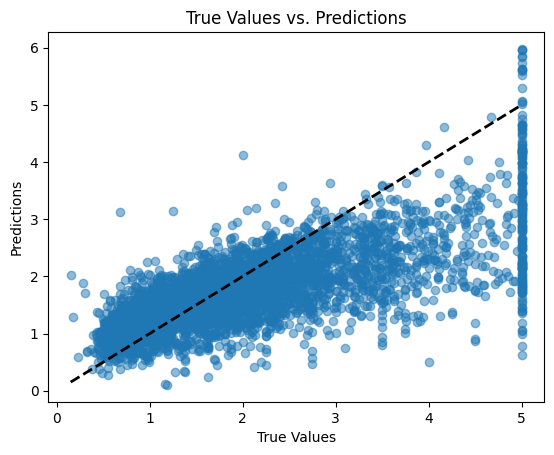

In [5]:
# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_size = X_train_tensor.shape[1]
model = LinearRegressionModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)

    # Calculate loss
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    y_pred = model(X_test_tensor)

# Calculate and print the final test loss
test_loss = criterion(y_pred, y_test_tensor)
print(f'Final Test Loss: {test_loss.item():.4f}')

# Plot the results
plt.scatter(y_test, y_pred.numpy(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()
